In [1]:
#Still need to preprocess to remove things that don't make sense and phrases from other languages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('fake_or_real_news.csv')
data = data.set_index("Unnamed: 0")
data.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [2]:
data.shape

(6335, 3)

In [3]:
y = data

In [4]:
y.drop("label",axis=1)
y.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33, random_state=53)

In [6]:
# Use tf-idf and count vectorizer to find most relevant words in corpus
# TfidfVectorizer should remove stop words and words that appear in more than 70% of the articles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  
tfidf_test = tfidf_vectorizer.transform(X_test)

In [7]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']
['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [8]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
count_df.describe()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.015551,0.399152,0.000707,0.000236,0.000236,0.000236,0.000236,0.000236,0.001649,0.000236,...,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236,0.000236
std,0.199560,1.182582,0.046050,0.015350,0.015350,0.015350,0.015350,0.015350,0.076742,0.015350,...,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350,0.015350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,22.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.describe()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000764,0.006902,0.000013,0.000015,0.000005,0.000020,0.000015,0.000006,0.000090,0.000021,...,0.000011,0.000012,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010
std,0.011669,0.019601,0.000816,0.000975,0.000334,0.001294,0.000967,0.000382,0.004145,0.001351,...,0.000707,0.000763,0.000707,0.000707,0.000707,0.000707,0.000707,0.000707,0.000707,0.000680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.542168,0.258131,0.053159,0.063539,0.021735,0.084326,0.063024,0.024901,0.208025,0.088025,...,0.046086,0.049711,0.046086,0.046086,0.046086,0.046086,0.046086,0.046086,0.046086,0.044279


In [11]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference 

set()

In [12]:
print(count_df.equals(tfidf_df)) # check if the vectorizers extracted different tokens

False


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# MultinomialNB
multi_nb = MultinomialNB()
np.shape(tfidf_train)
np.shape(y_train)
multi_nb.fit(tfidf_train, y_train['label'])
pred = multi_nb.predict(tfidf_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score) # Multinomial Naive Bayes accuracy: 0.857

accuracy:   0.857


In [14]:
# Use a confusion matrix to compare accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])

In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


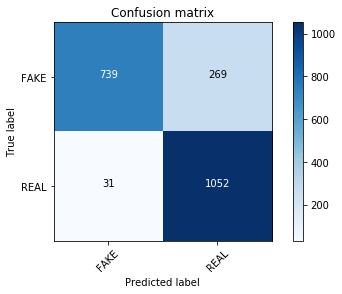

In [16]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

In [17]:
count_multi_nb = MultinomialNB()
count_multi_nb.fit(count_train,y_train['label'])
c_pred = count_multi_nb.predict(count_test)
c_score = accuracy_score(y_test['label'],pred)
print("accuracy:   %0.3f" % c_score)
# this isn't outperforming tf-idf for some reason

accuracy:   0.857
